,Dataset,Model,Threshold,ACC,AUC,Sensitivity,Specificity,NPV,PPV,F1
0,train,vit,0.518,0.778,0.862,0.766,0.792,0.757,0.800,0.783
1,val,vit,0.421,0.748,0.786,0.800,0.688,0.750,0.746,0.772
2,test,vit,0.413,0.673,0.636,0.778,0.560,0.700,0.656,0.712


,Dataset,Model,ACC,AUC,Sensitivity,Specificity,NPV,PPV,F1
0,train,vit,"[0.7367728531855956, 0.8227146814404432]","[0.8226163755995572, 0.8986010330832617]","[0.7074468085106383, 0.824468085106383]","[0.7283236994219653, 0.8497109826589595]","[0.7105188397129186, 0.8068400349650349]","[0.7513797538659417, 0.8516534391534392]","[0.7388739669421488, 0.827027027027027]"
1,val,vit,"[0.6699029126213593, 0.8252427184466019]","[0.6976988636363637, 0.8693181818181818]","[0.6909090909090909, 0.8913636363636359]","[0.5625, 0.8125]","[0.6481481481481481, 0.860090909090909]","[0.6666666666666666, 0.8270127118644066]","[0.6923076923076923, 0.8403361344537814]"
2,test,vit,"[0.5384615384615384, 0.8076923076923077]","[0.4636666666666666, 0.7881851851851851]","[0.5925925925925926, 0.9259259259259259]","[0.36, 0.76]","[0.5332352941176471, 0.875]","[0.55, 0.7741935483870968]","[0.5925925925925926, 0.8235760971055089]"


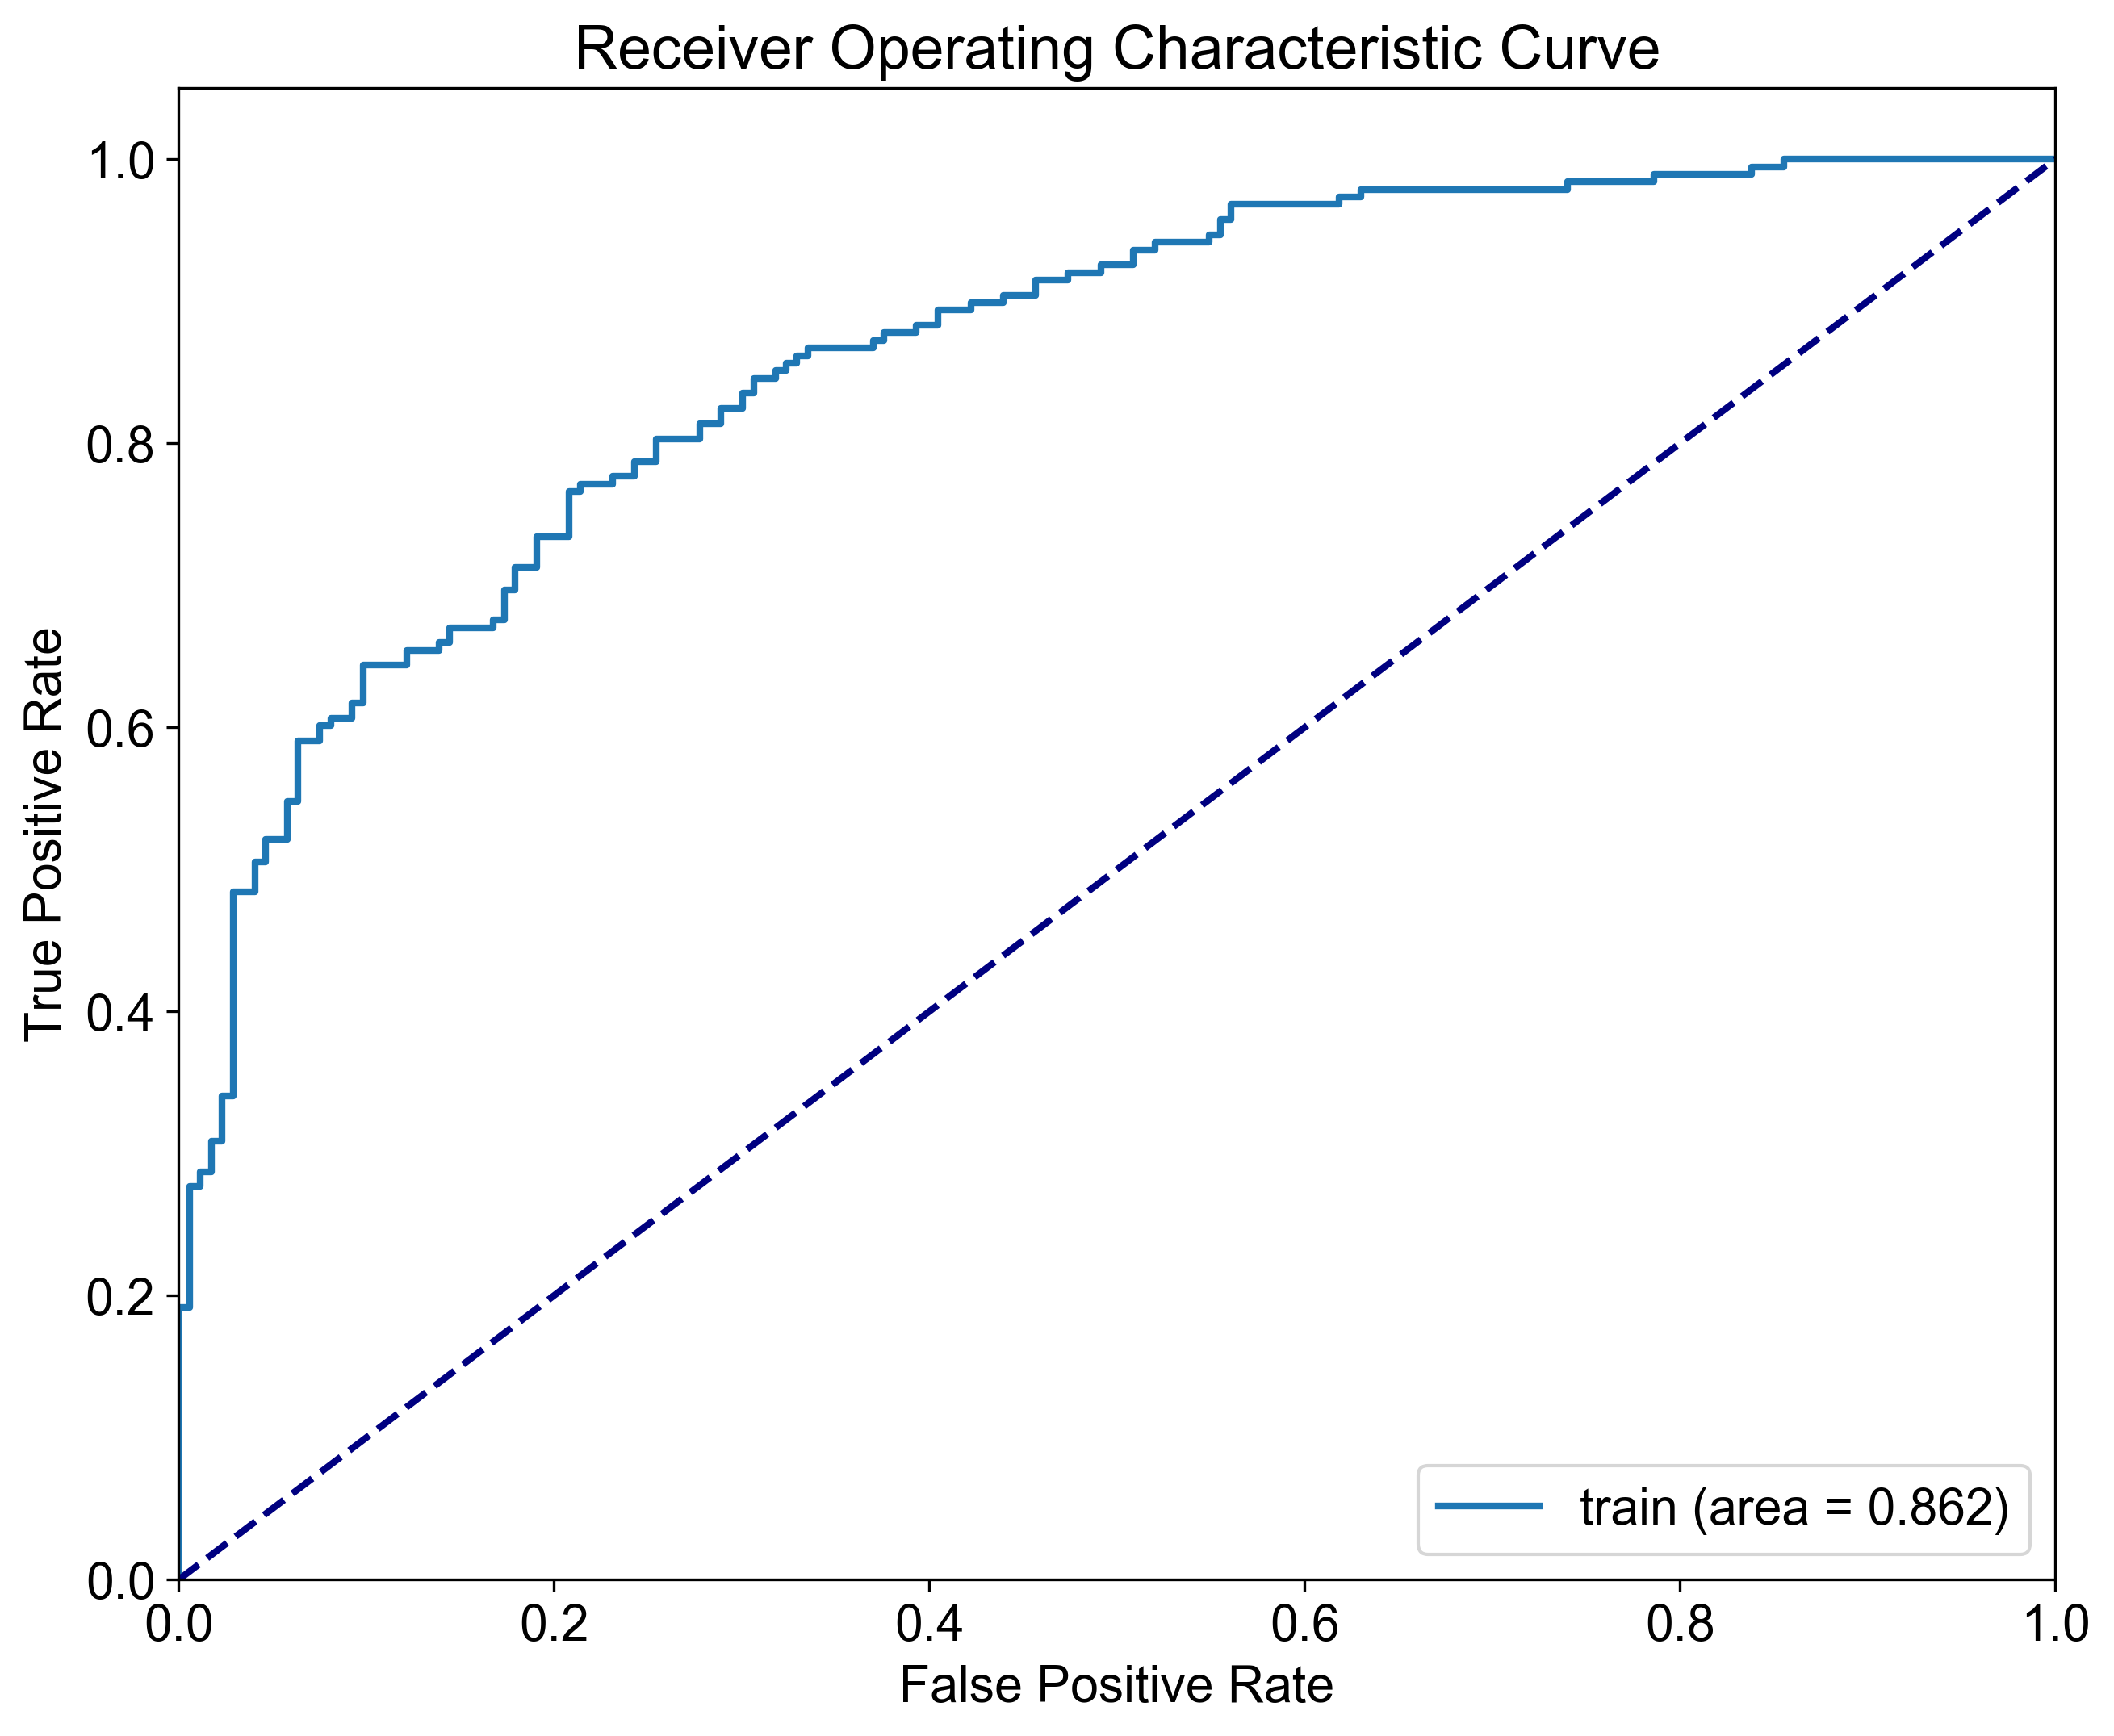

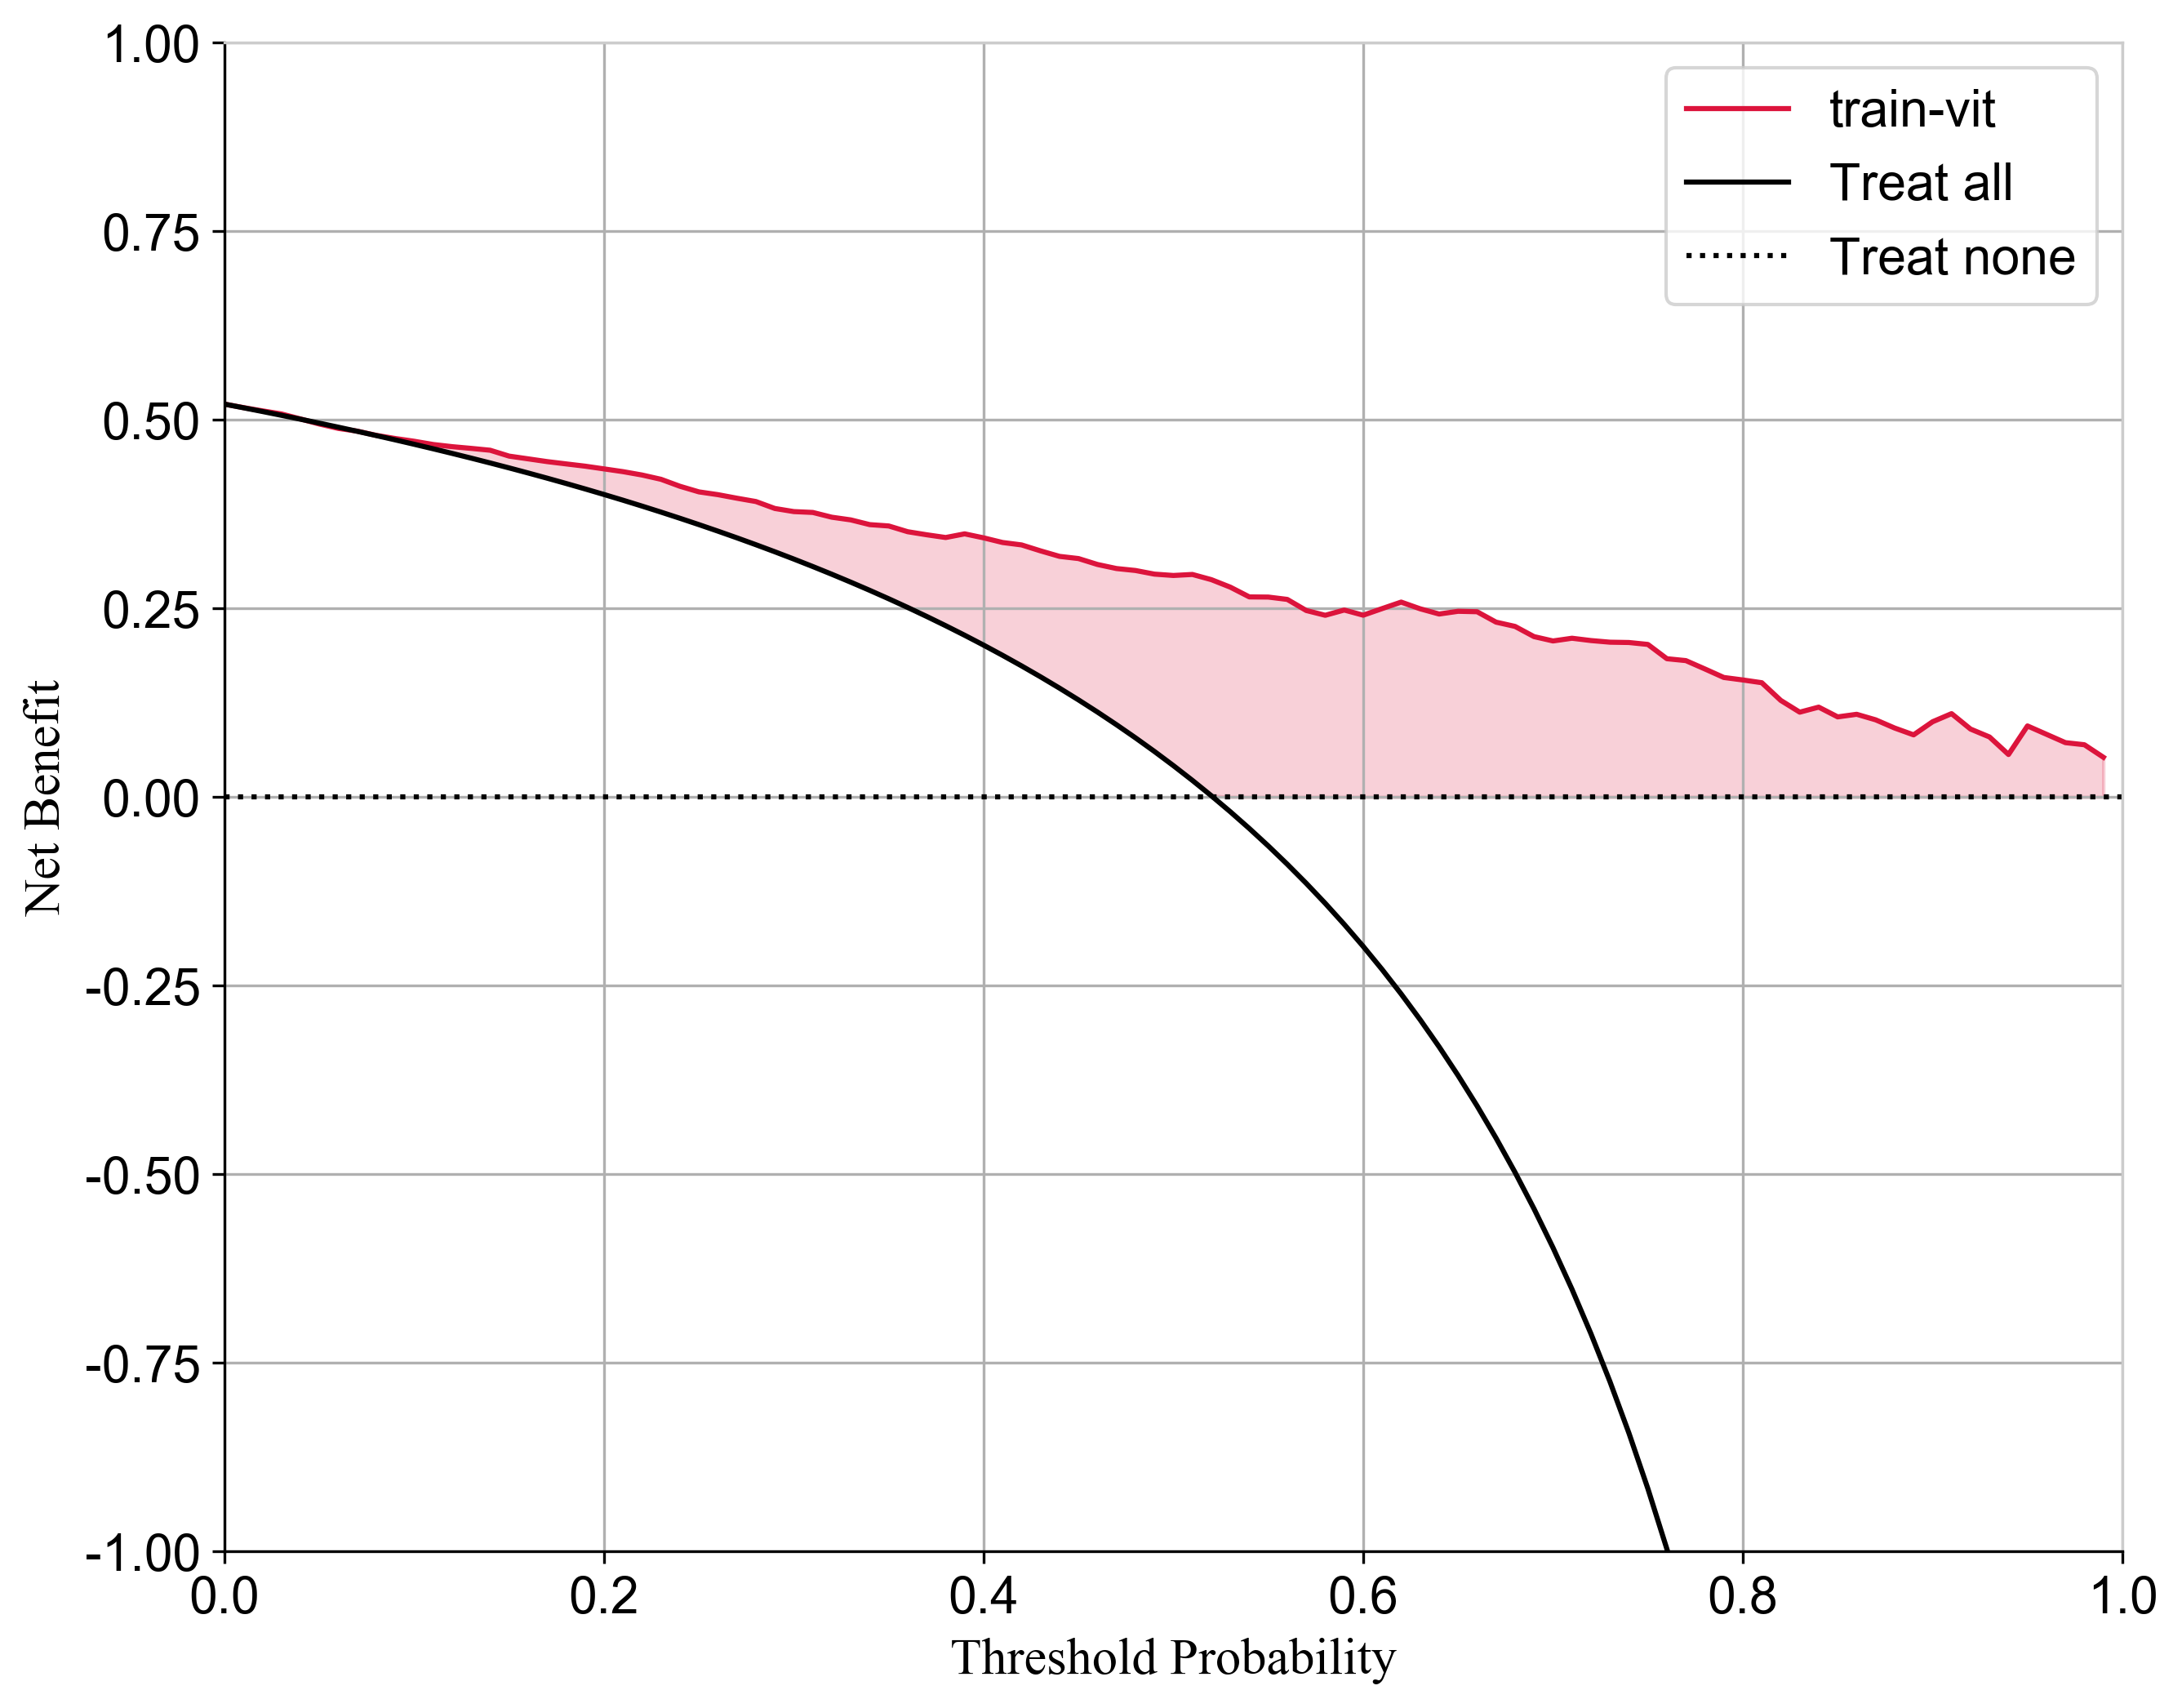

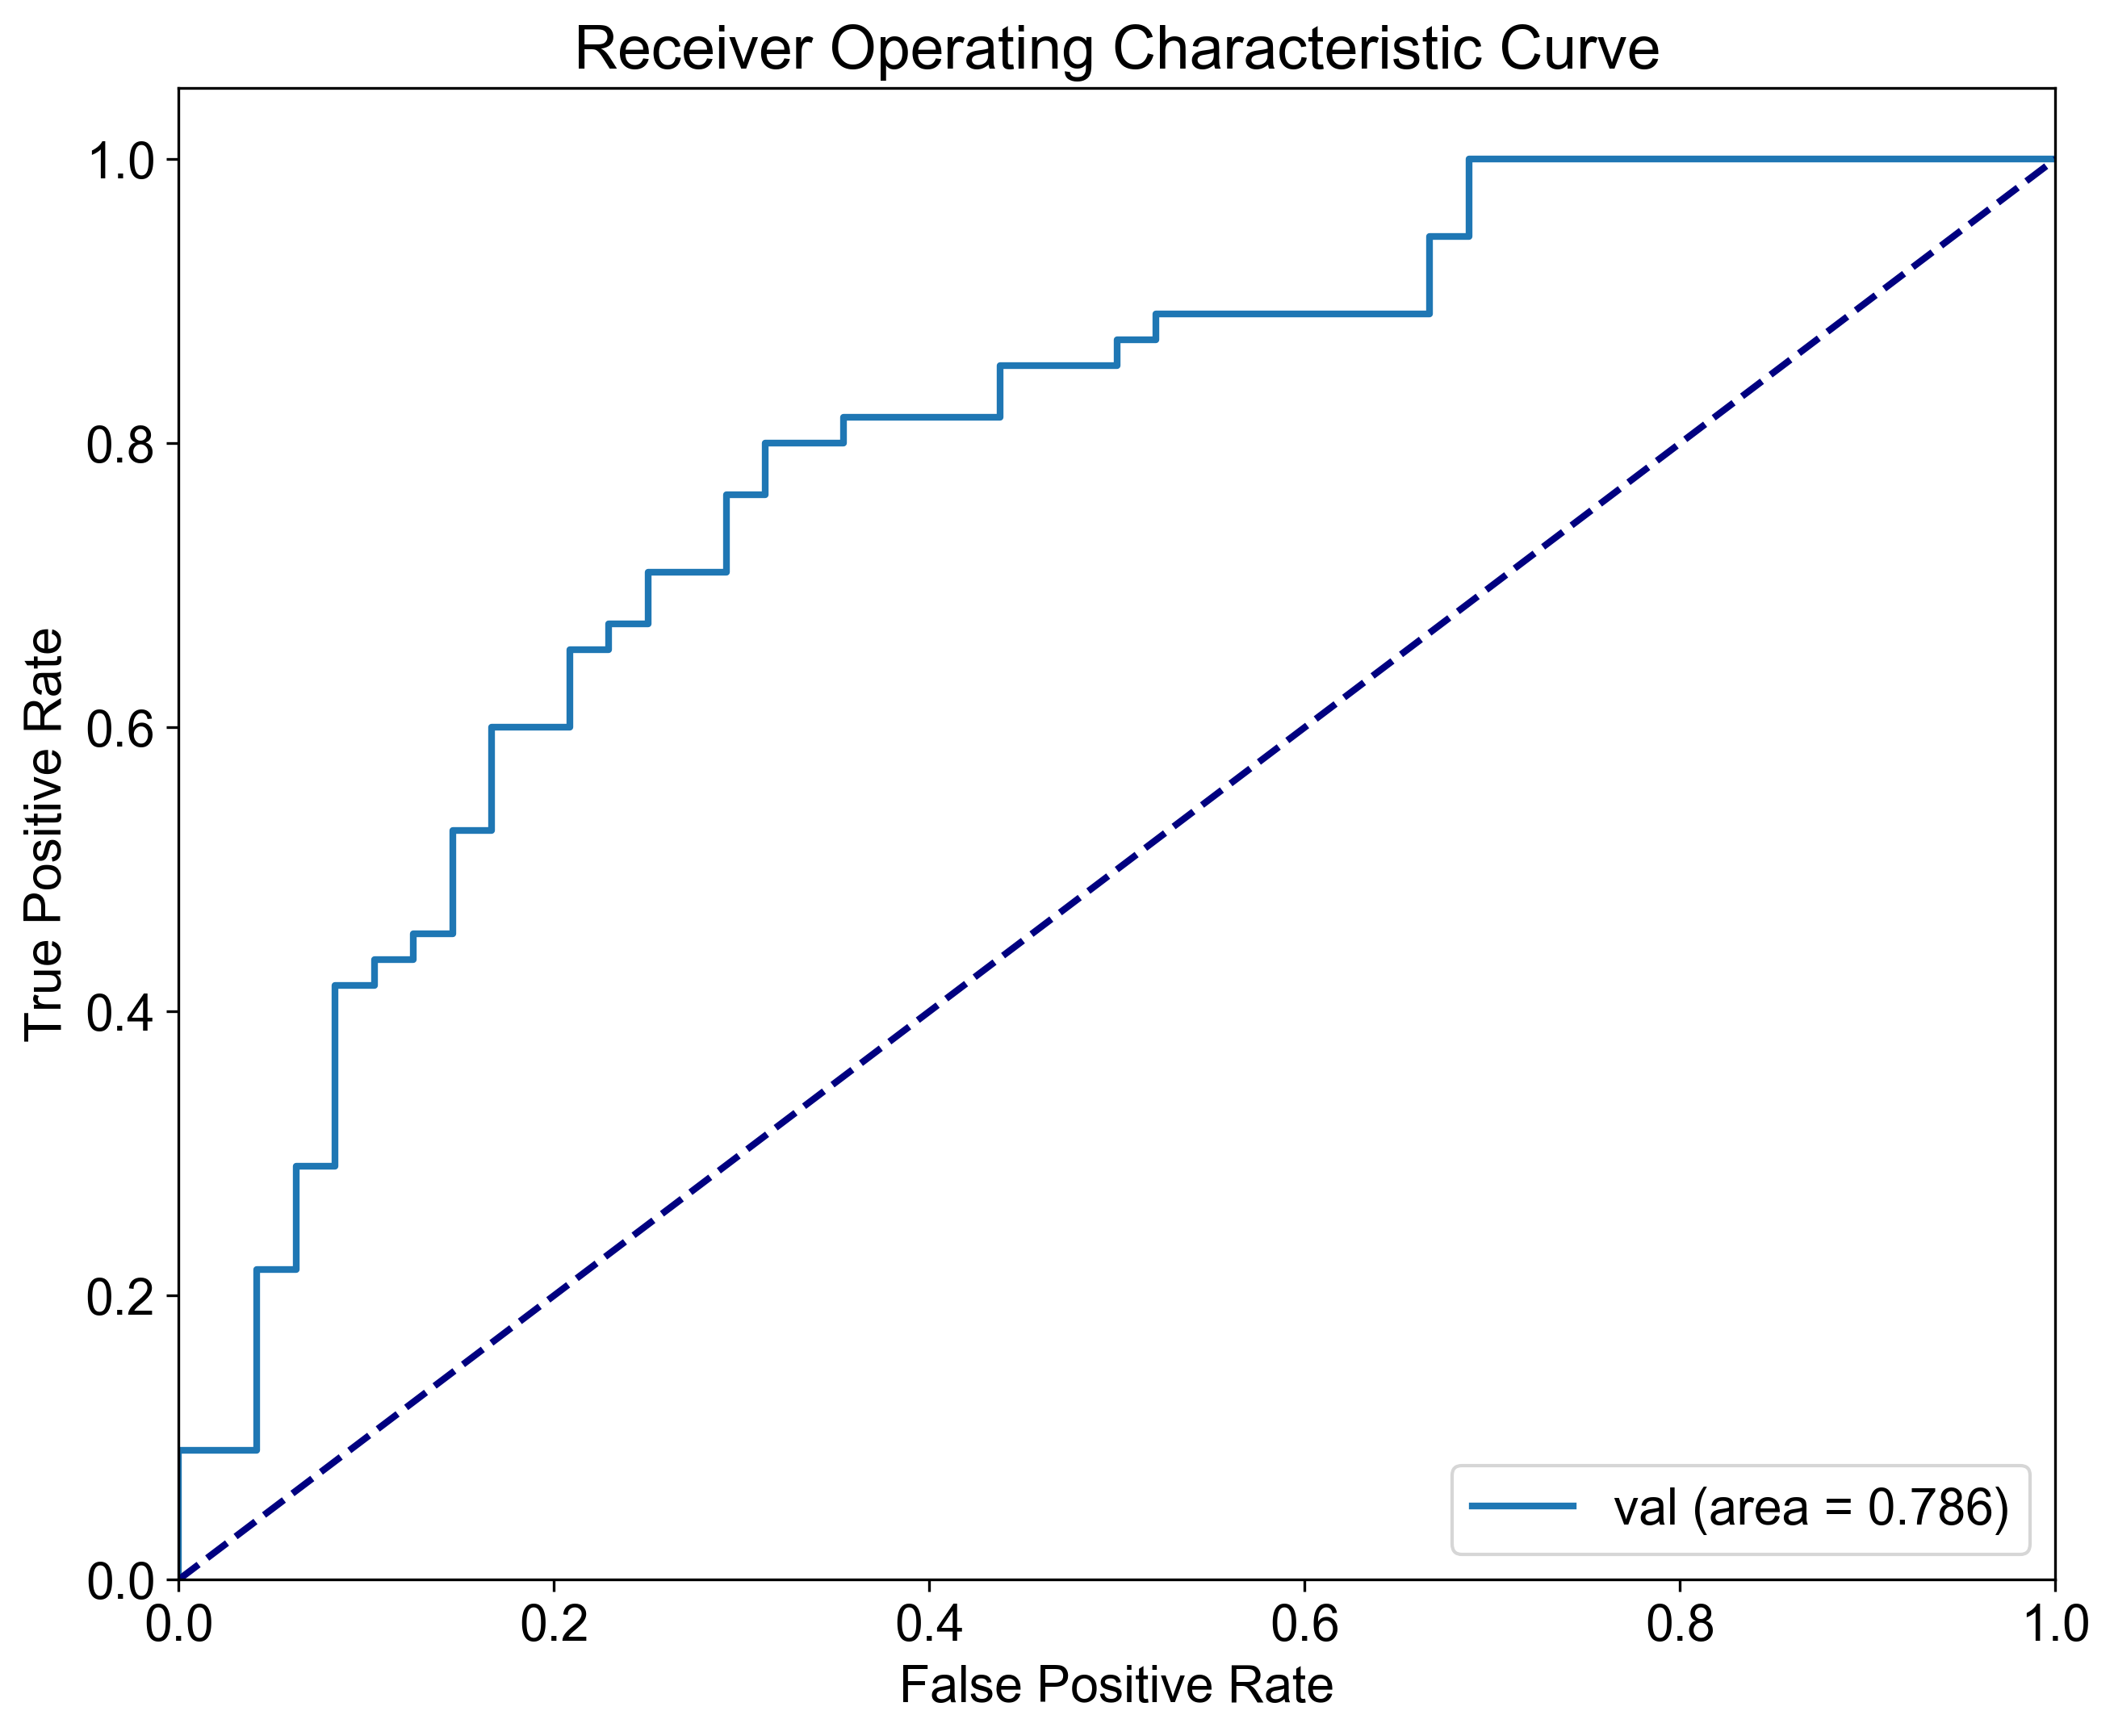

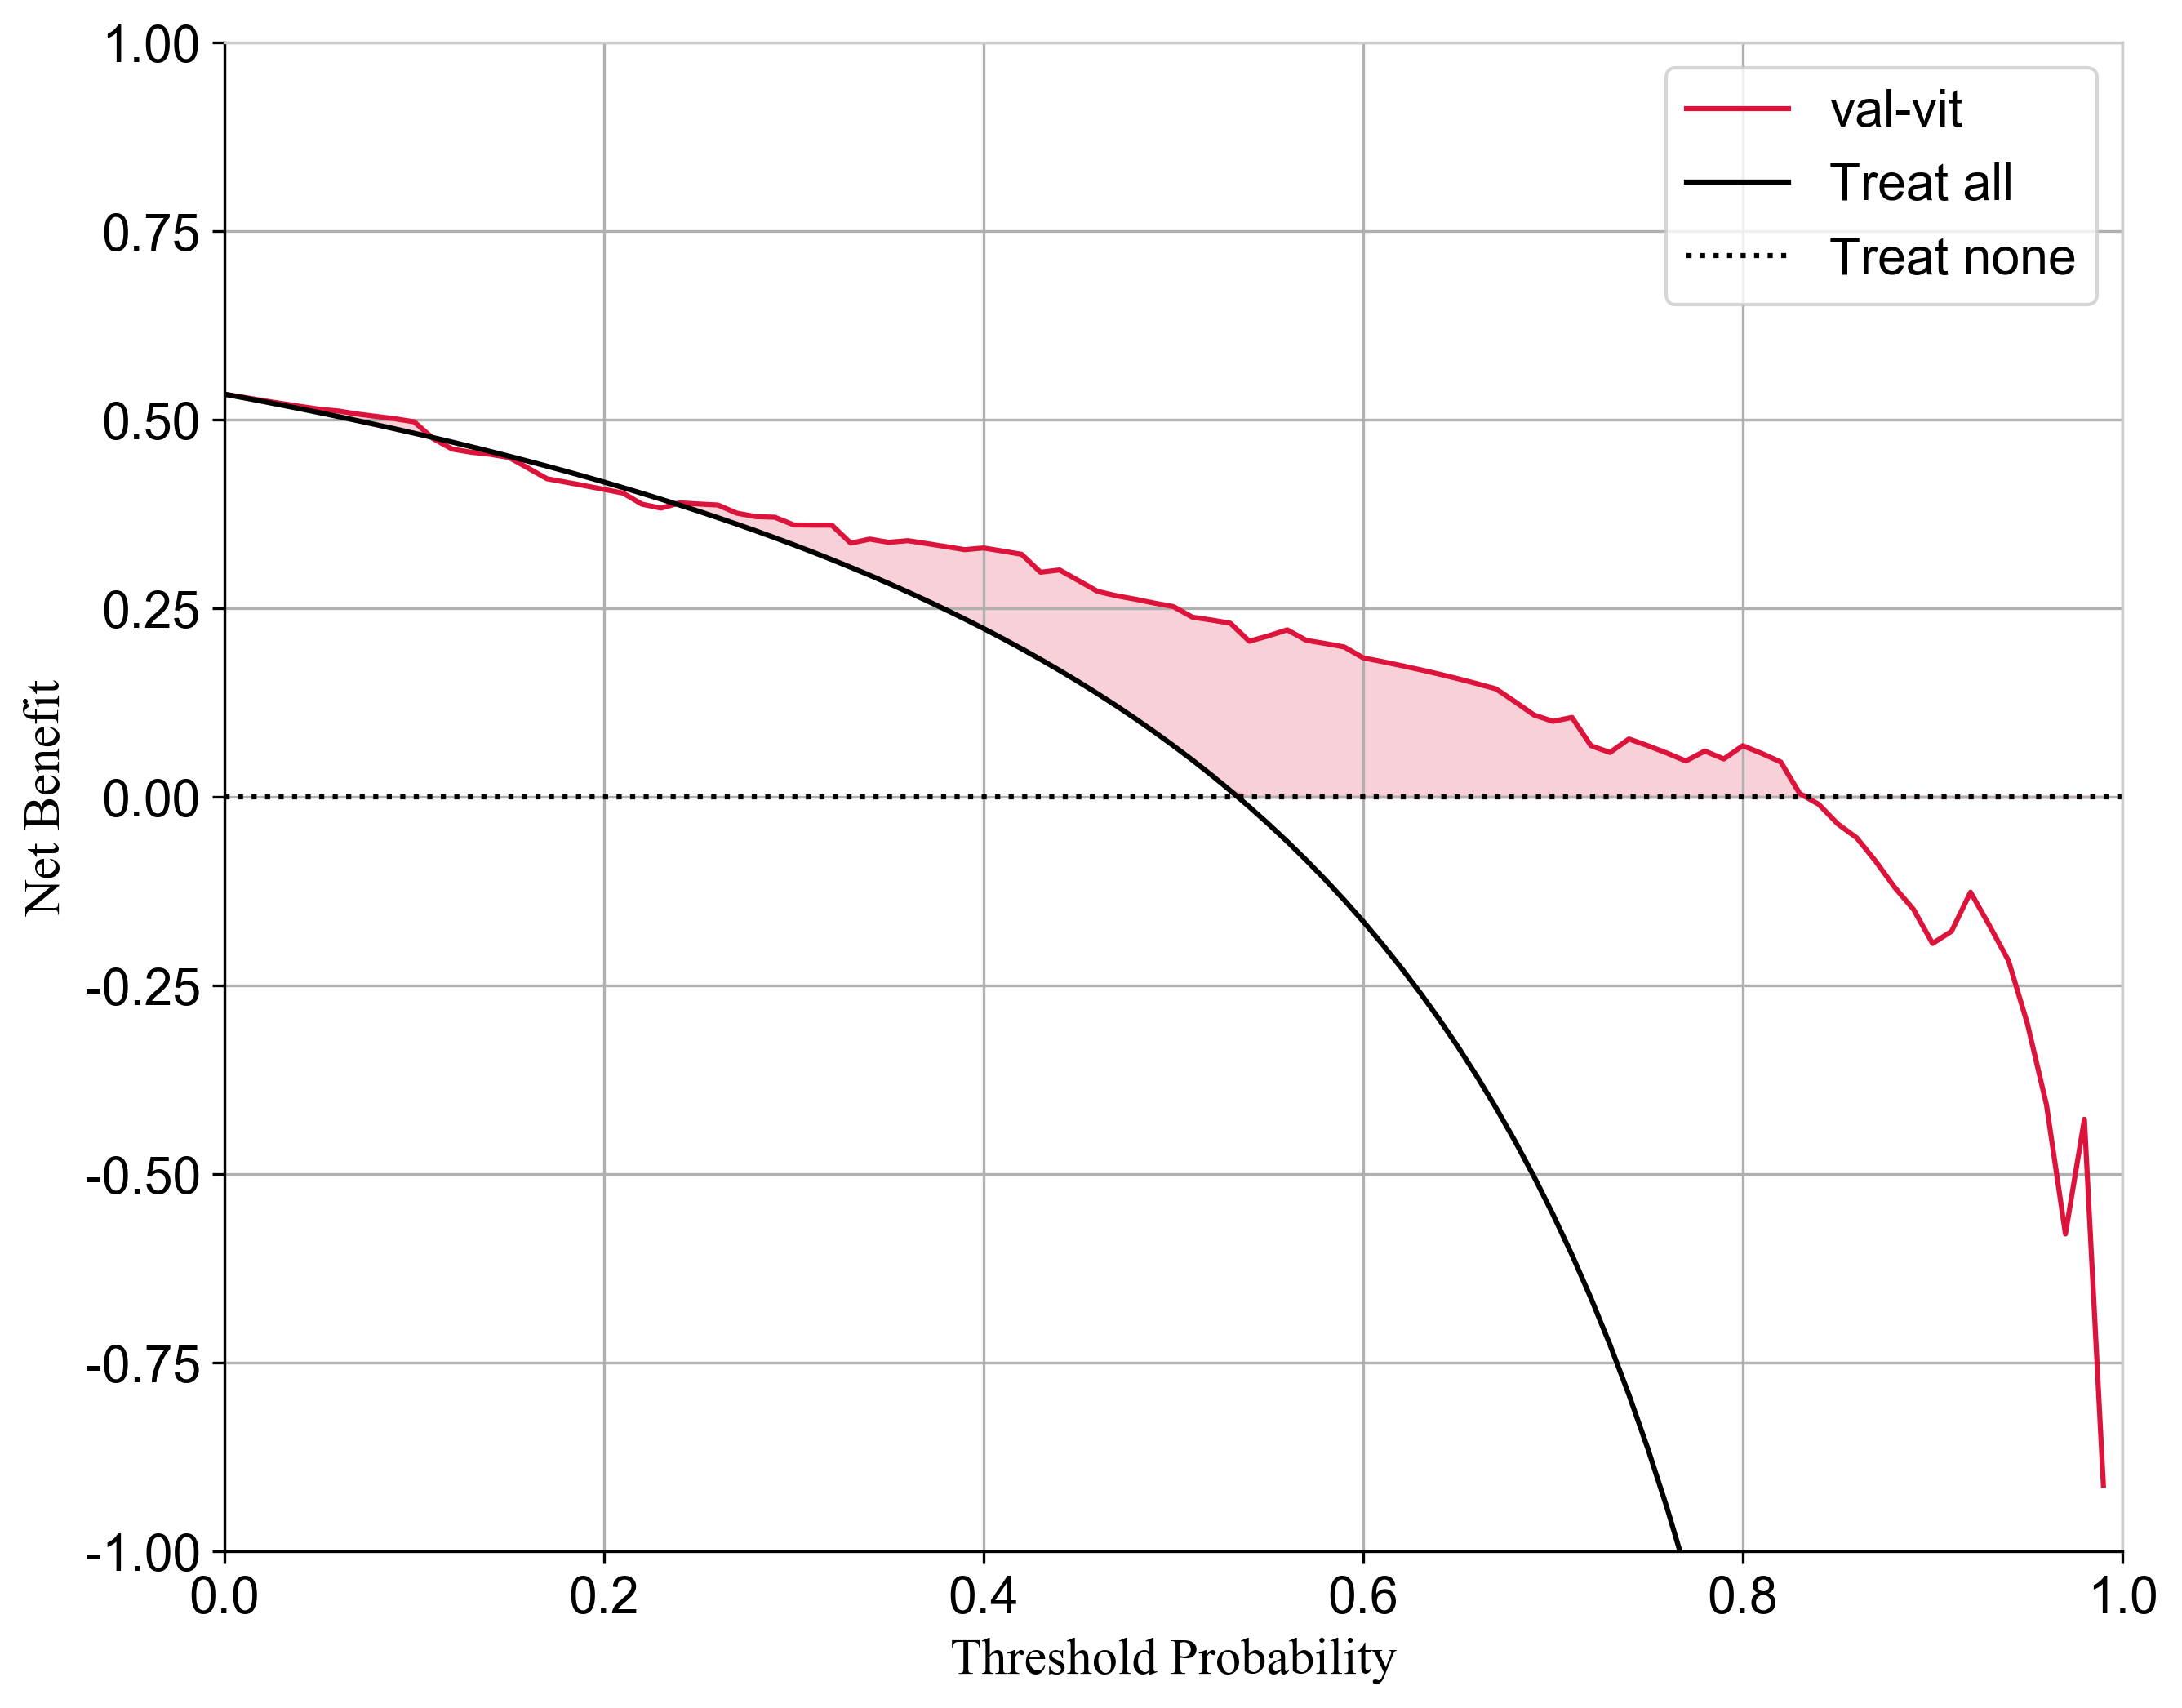

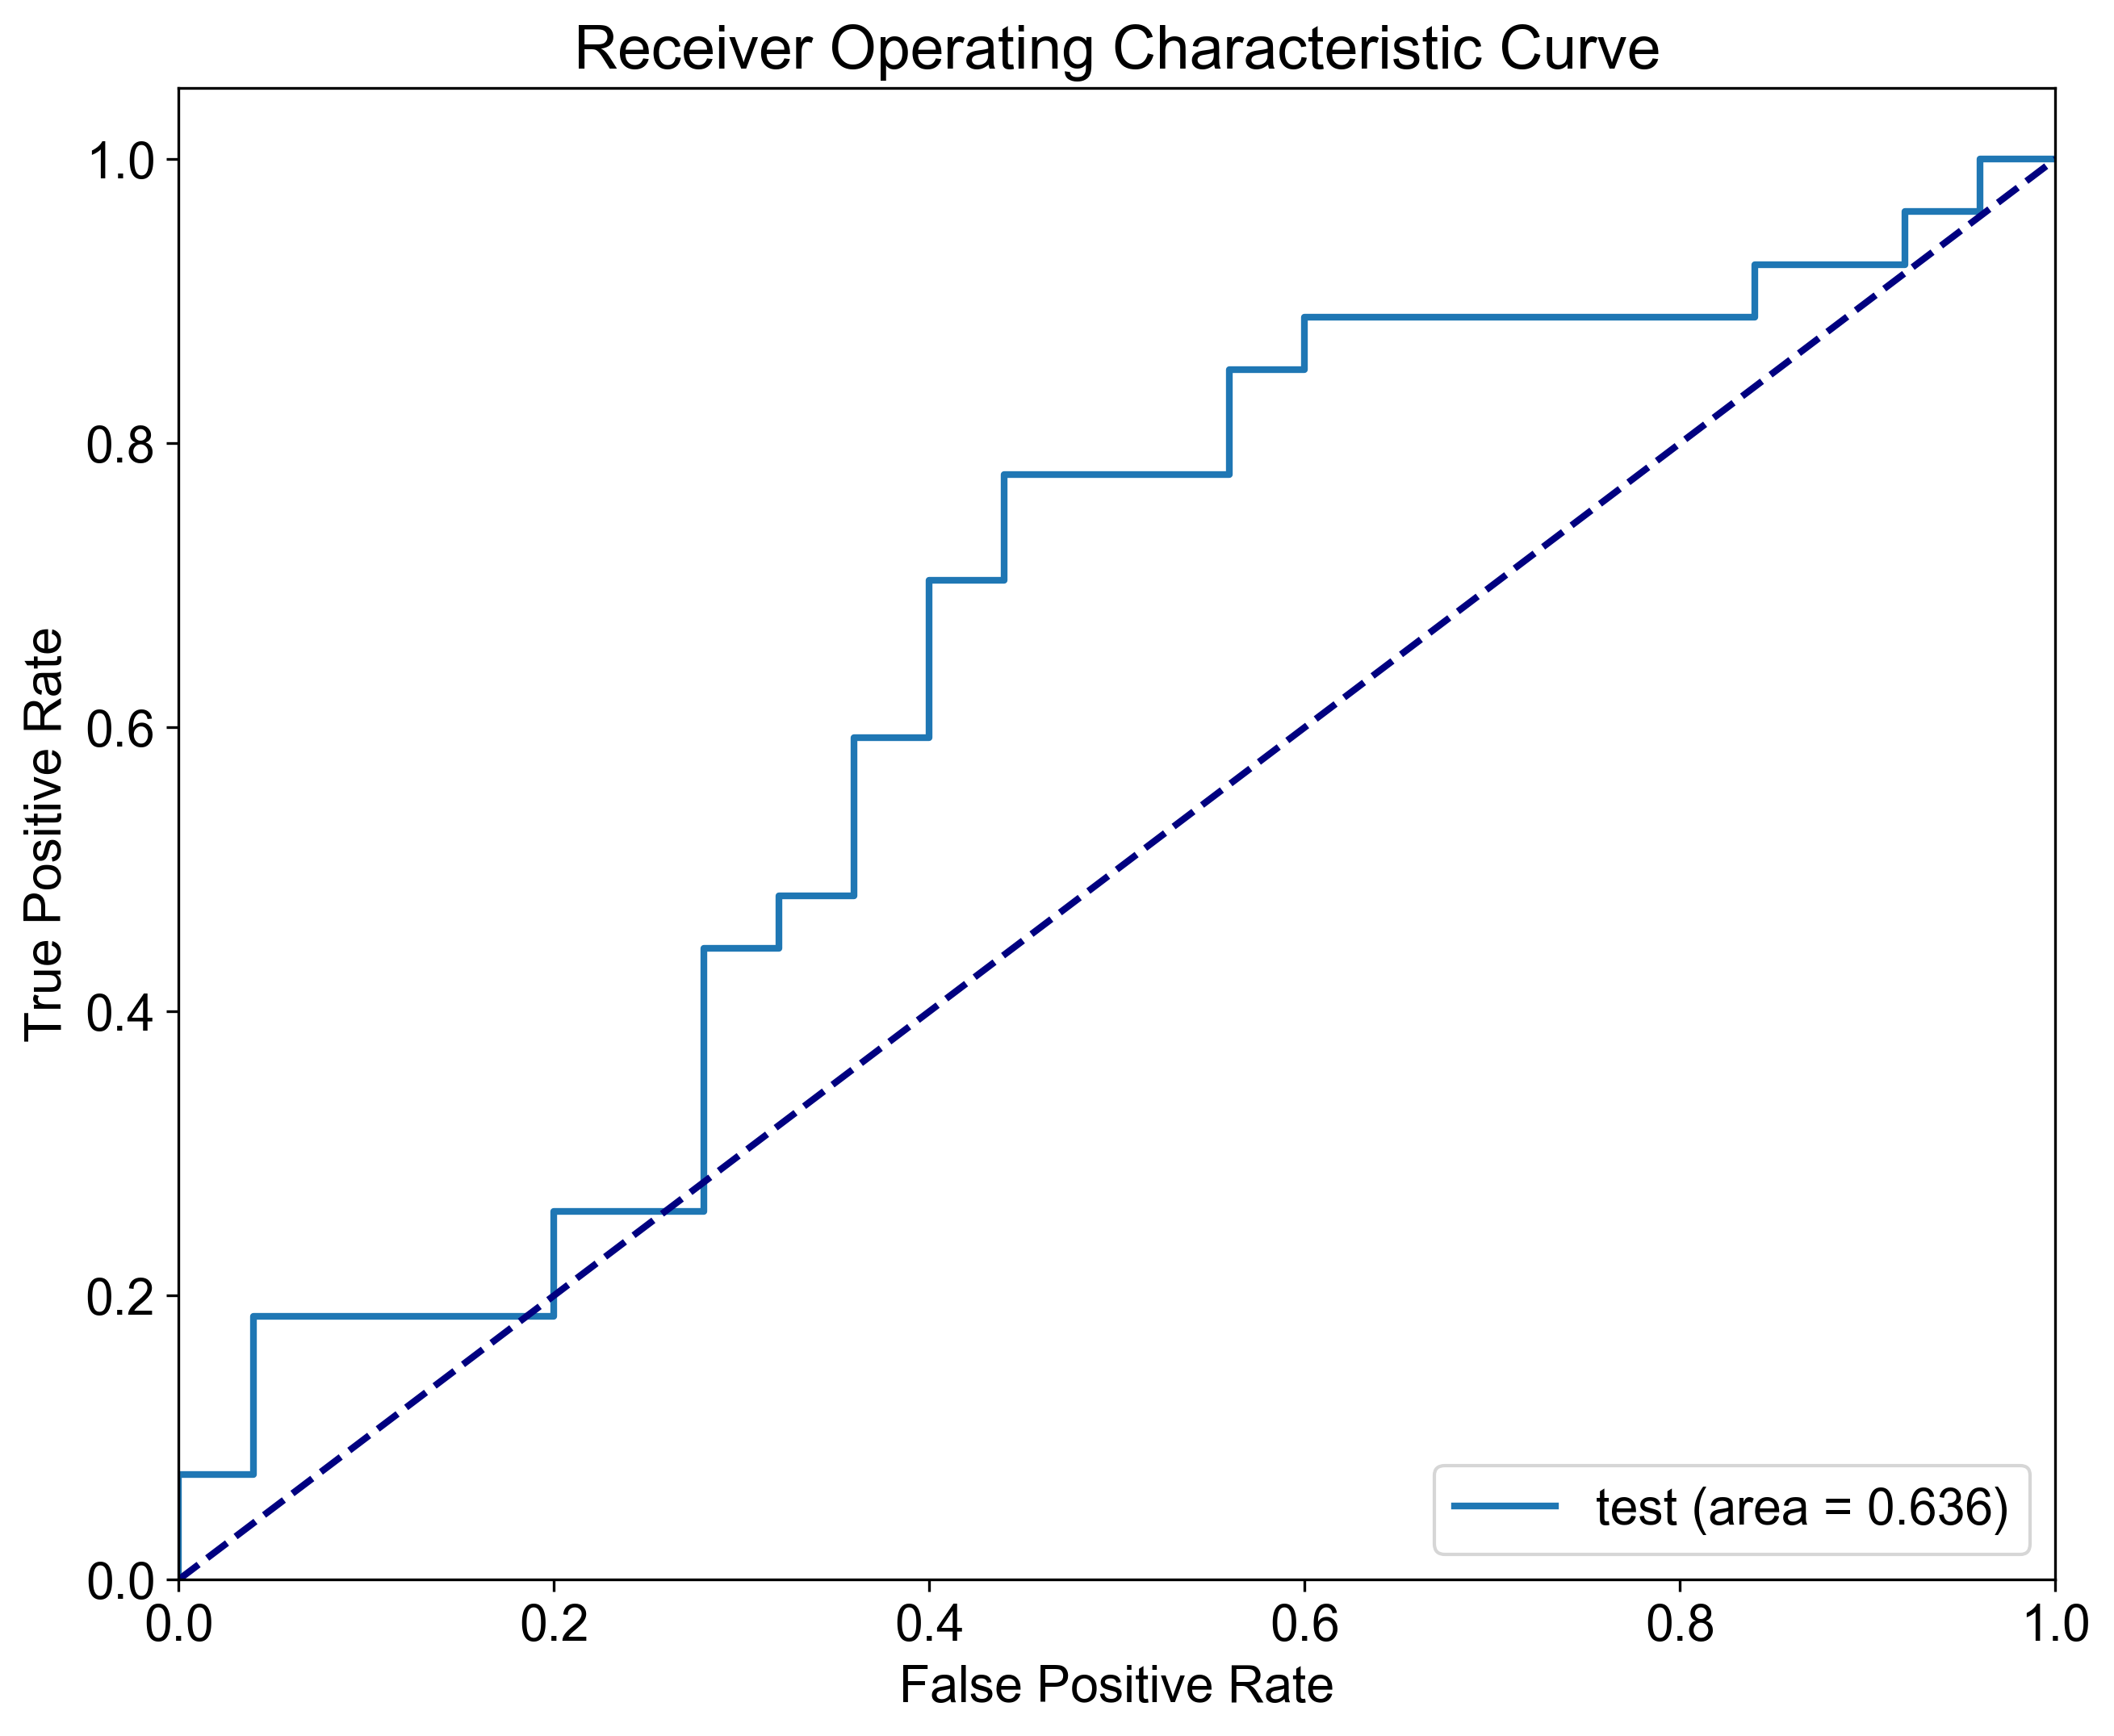

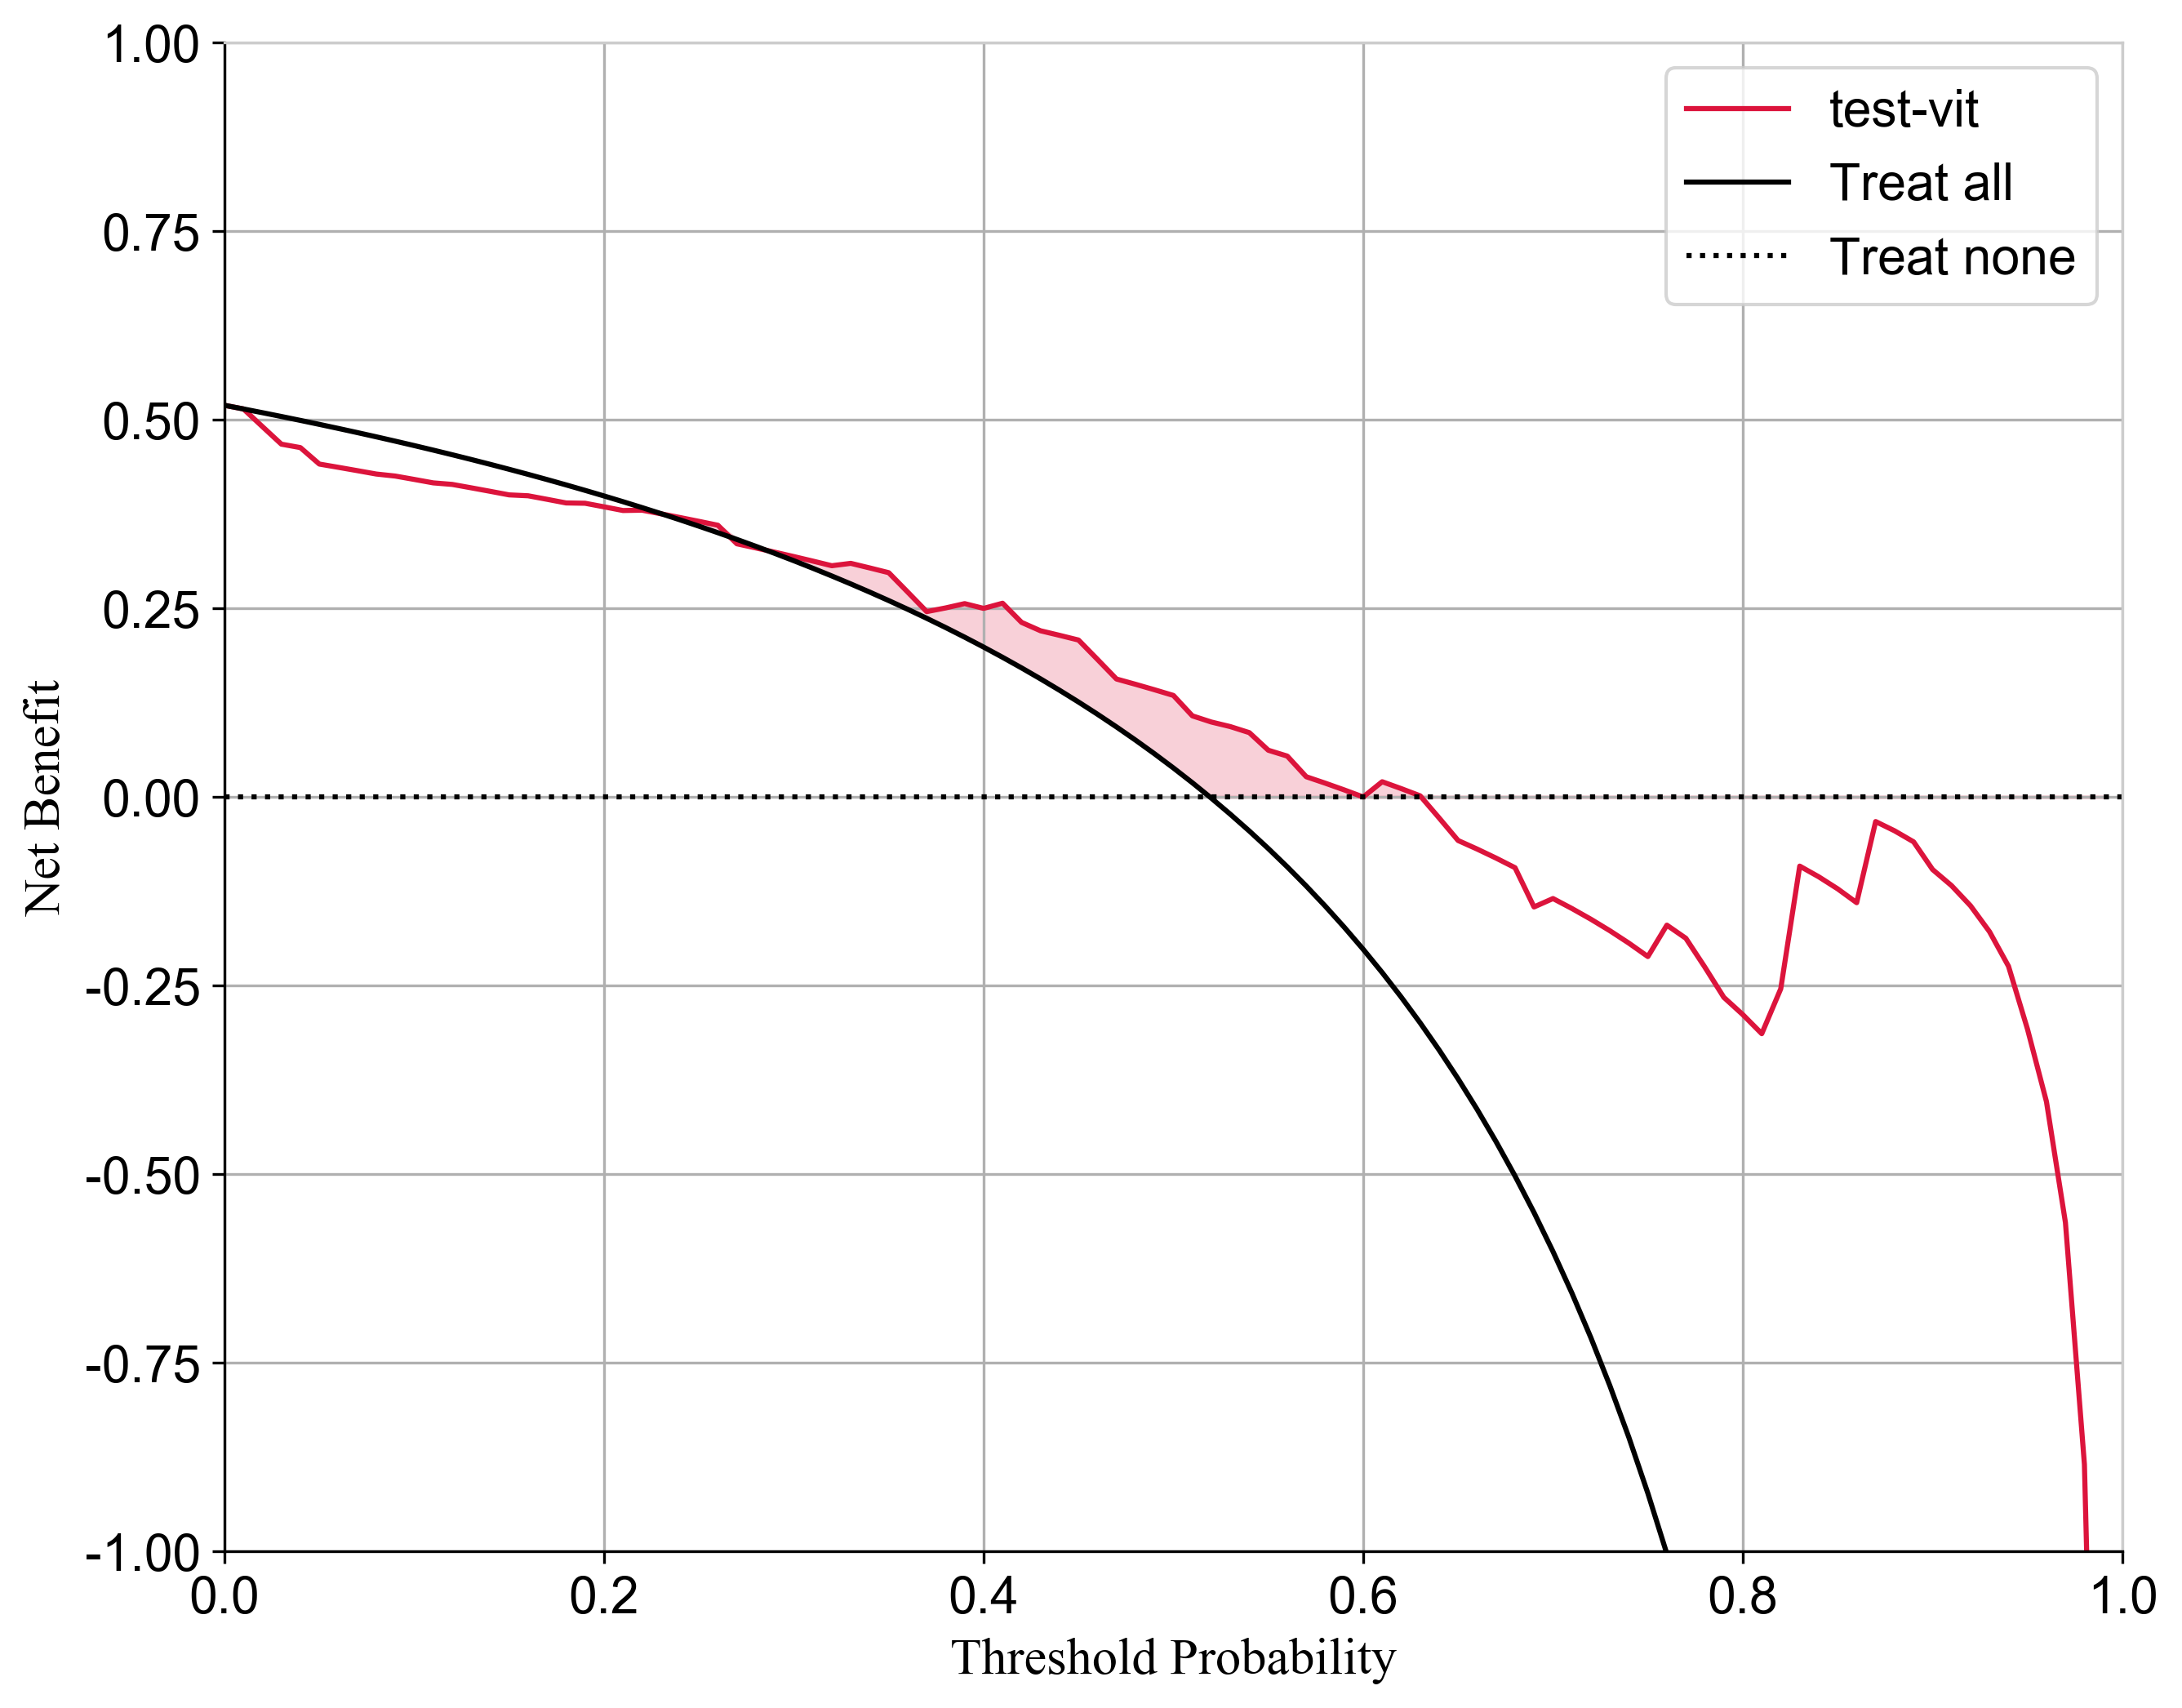

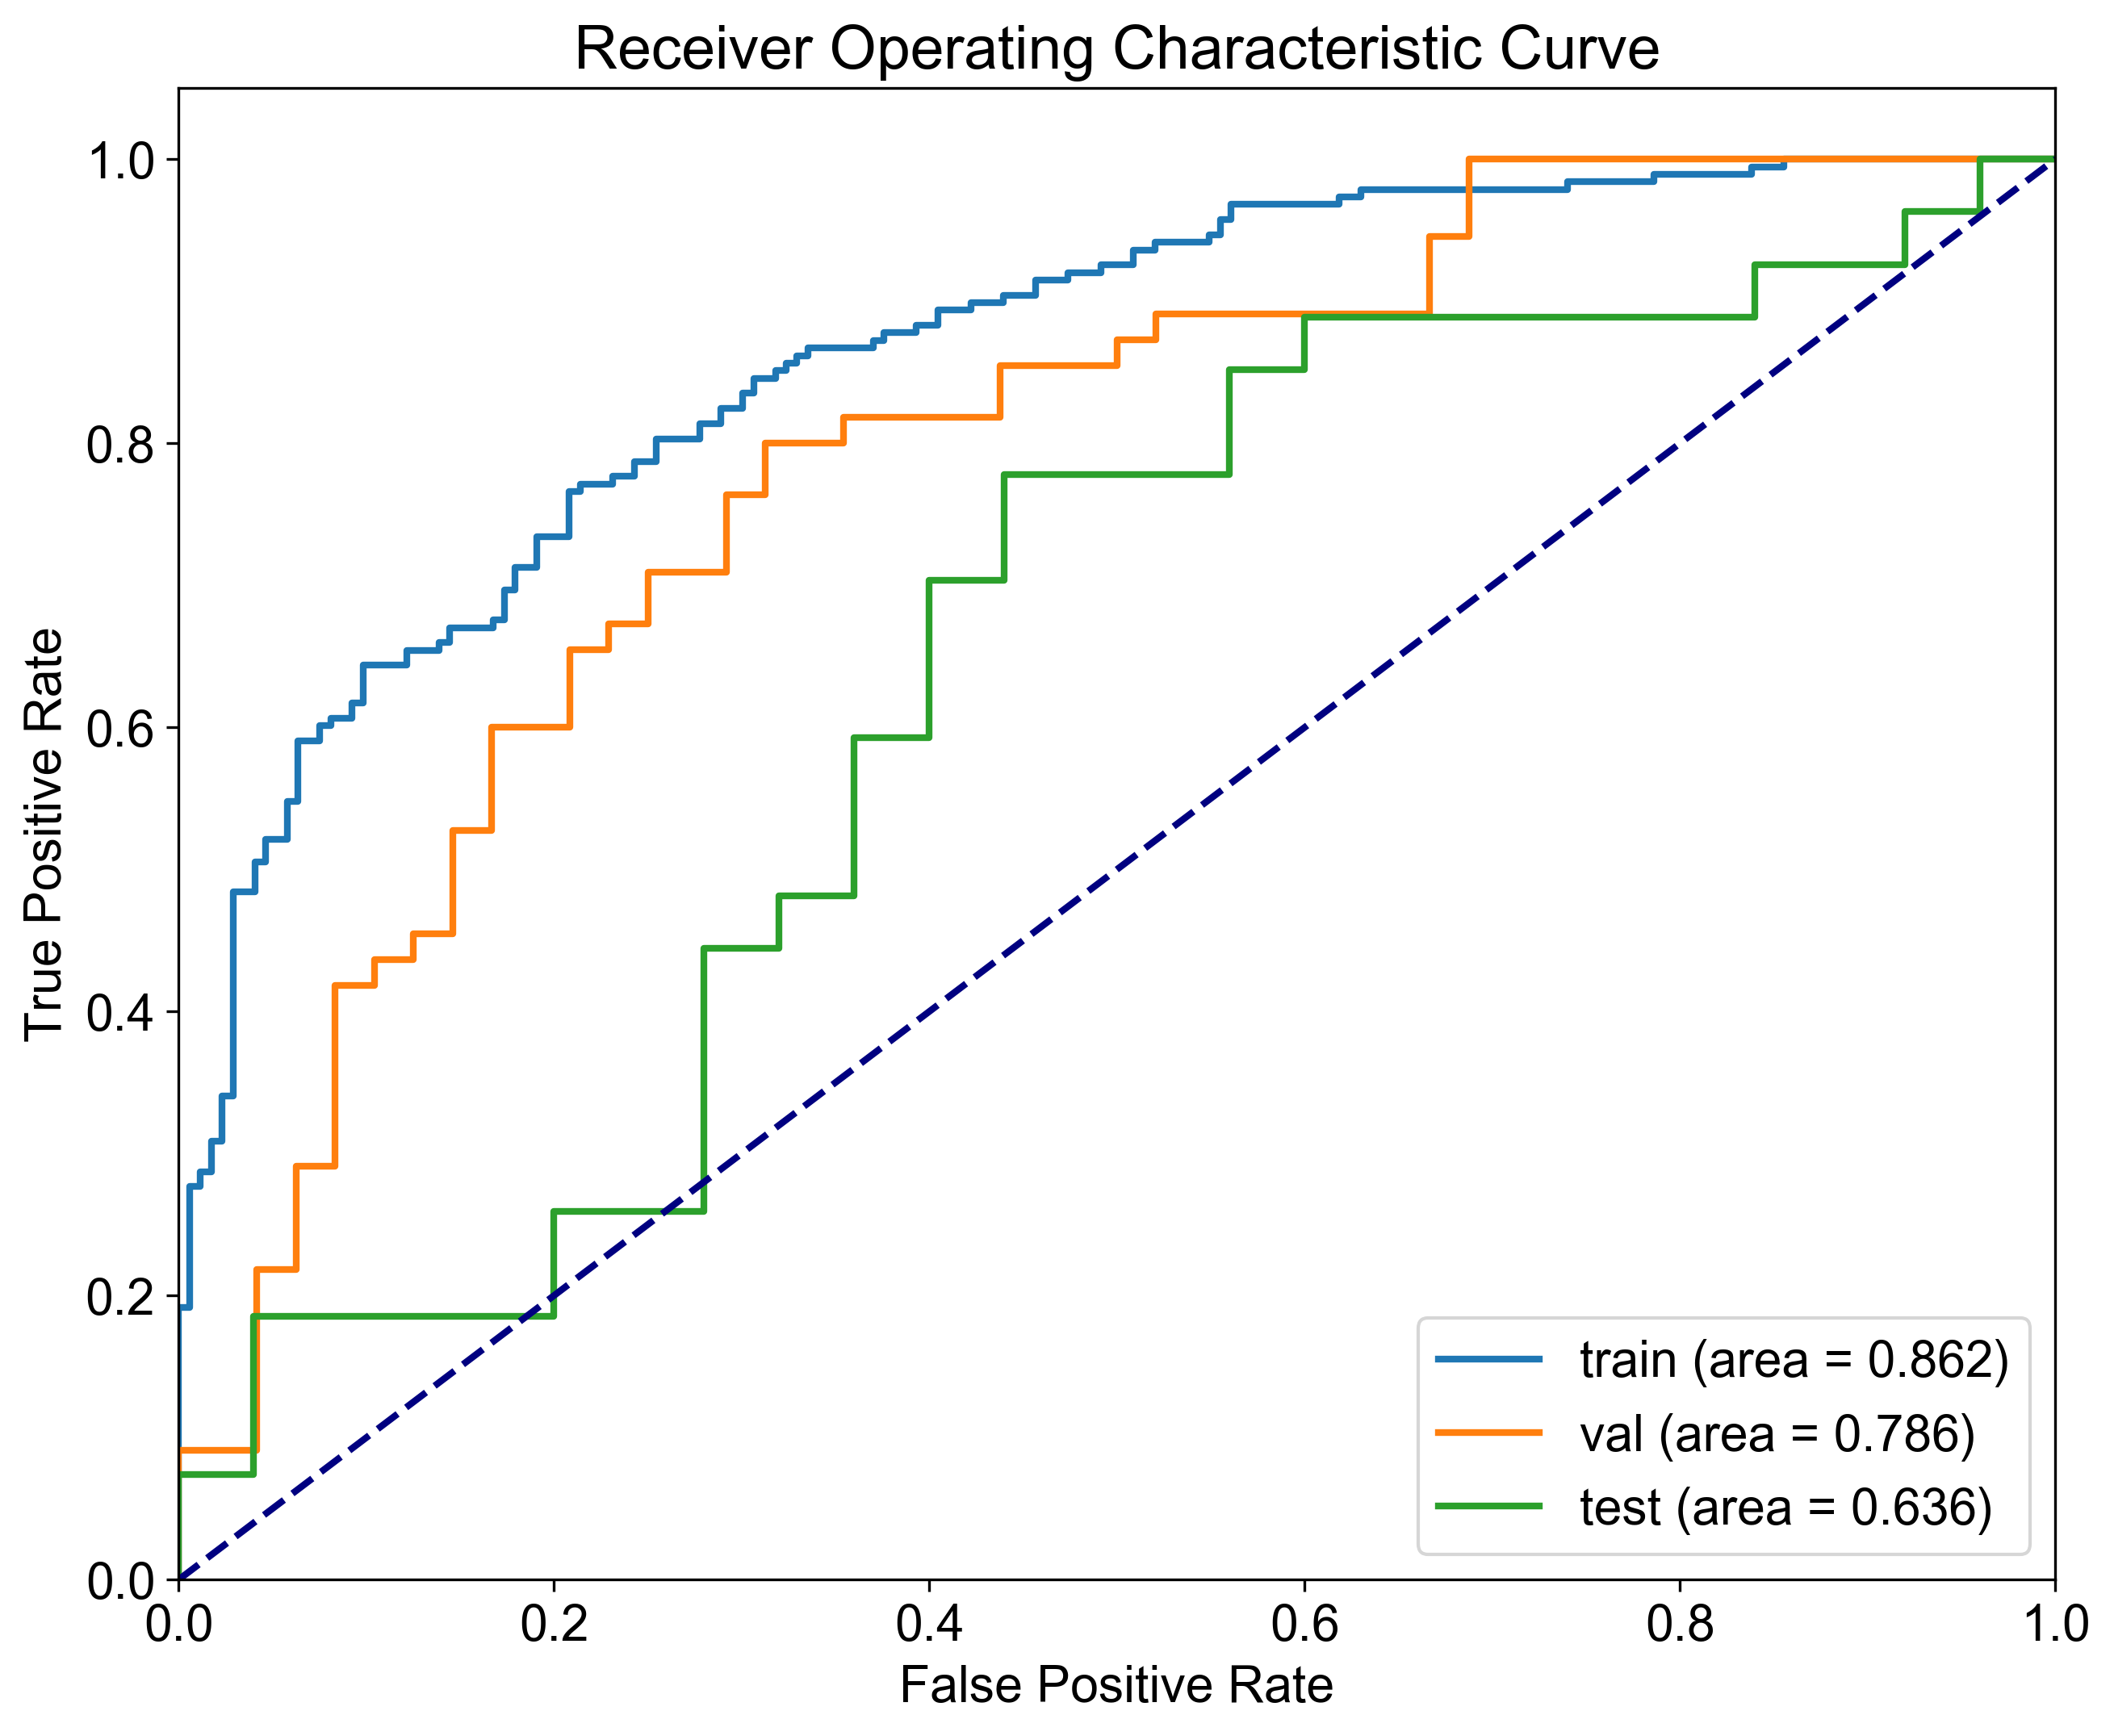

In [1]:
import os
import pandas as pd
import numpy as np
from pixelmed_calc.medical_imaging.RadiologyComponents.components1 import calculate_metrics_with_ci as metrics
from pixelmed_calc.medical_imaging.RadiologyComponents.components1 import HosmerLemeshow
from pixelmed_calc.medical_imaging.Ploting.plot_metric import plot_multiple_ROCs,plot_calibration_curves,plot_DCA_curve
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

def calculate_metrics_and_ci(csv_path, dataset_name, model_name,threshold):
    data = pd.read_csv(csv_path)
    ytrue = data['target']
    yprob = data['probability_1']
    metric, ci = metrics(np.array(ytrue), np.array(yprob),threshold=threshold)
    
    result = {
        'Dataset': dataset_name,
        'Model': model_name,
        'Threshold': metric['threshold'],
        'ACC': metric['accuracy'],
        'AUC': metric['auc'],
        'Sensitivity': metric['sensitivity'],
        'Specificity': metric['specificity'],
        'NPV': metric['npv'],
        'PPV': metric['ppv'],
        'F1': metric['f1'],
    }
    ci_result = {
        'Dataset': dataset_name,
        'Model': model_name,
        'ACC': ci['accuracy'],
        'AUC': ci['auc'],
        'Sensitivity': ci['sensitivity'],
        'Specificity': ci['specificity'],
        'NPV': ci['npv'],
        'PPV': ci['ppv'],
        'F1': ci['f1'],
    }
    
    return result, ci_result
# Initialize results DataFrame
results = pd.DataFrame(columns=['Dataset', 'Model', 'Threshold', 'ACC', 'AUC', 'Sensitivity', 'Specificity', 'NPV', 'PPV', 'F1'])
ci_results = pd.DataFrame(columns=['Dataset', 'Model', 'ACC', 'AUC', 'Sensitivity', 'Specificity', 'NPV', 'PPV', 'F1'])
# Define the structure of directories and files
base_dir = r"/Users/y2k/workstation_y2k/132liver/datacsv/DL_contrast"
datasets = ['train', 'val','test']  # List of dataset names
models = ['vit']  # List of model names
gt_list=[]
prob_list=[]
# Iterate over each model and dataset
for model_name in models:
    for dataset_name in datasets:
        csv_path = os.path.join(base_dir,  f'{dataset_name}_metrics_epoch_42.csv')
        res_csv=pd.read_csv(csv_path)
        gt_list.append(res_csv['target'])
        prob_list.append(res_csv['probability_1'])
        plot_multiple_ROCs([res_csv['target']],[res_csv['probability_1']],models=[dataset_name])
        plot_DCA_curve(res_csv['probability_1'],res_csv['target'],model=f"{dataset_name}-vit")
        #csv_path = os.path.join(base_dir, 'model_name', f'{dataset_name}_metrics_epoch_1.csv')
        if os.path.exists(csv_path):
            result, ci_result = calculate_metrics_and_ci(csv_path, dataset_name, model_name,threshold=None)
            results = pd.concat([results, pd.DataFrame([result])], ignore_index=True)
            ci_results = pd.concat([ci_results, pd.DataFrame([ci_result])], ignore_index=True)
        else:
            print(f"File not found: {csv_path}")
plot_multiple_ROCs(gt_list,prob_list,models=datasets)
# 查看结果
results.to_csv('results.csv', index=False)
ci_results.to_csv('ci_results.csv', index=False)
display(results)
display(ci_results)

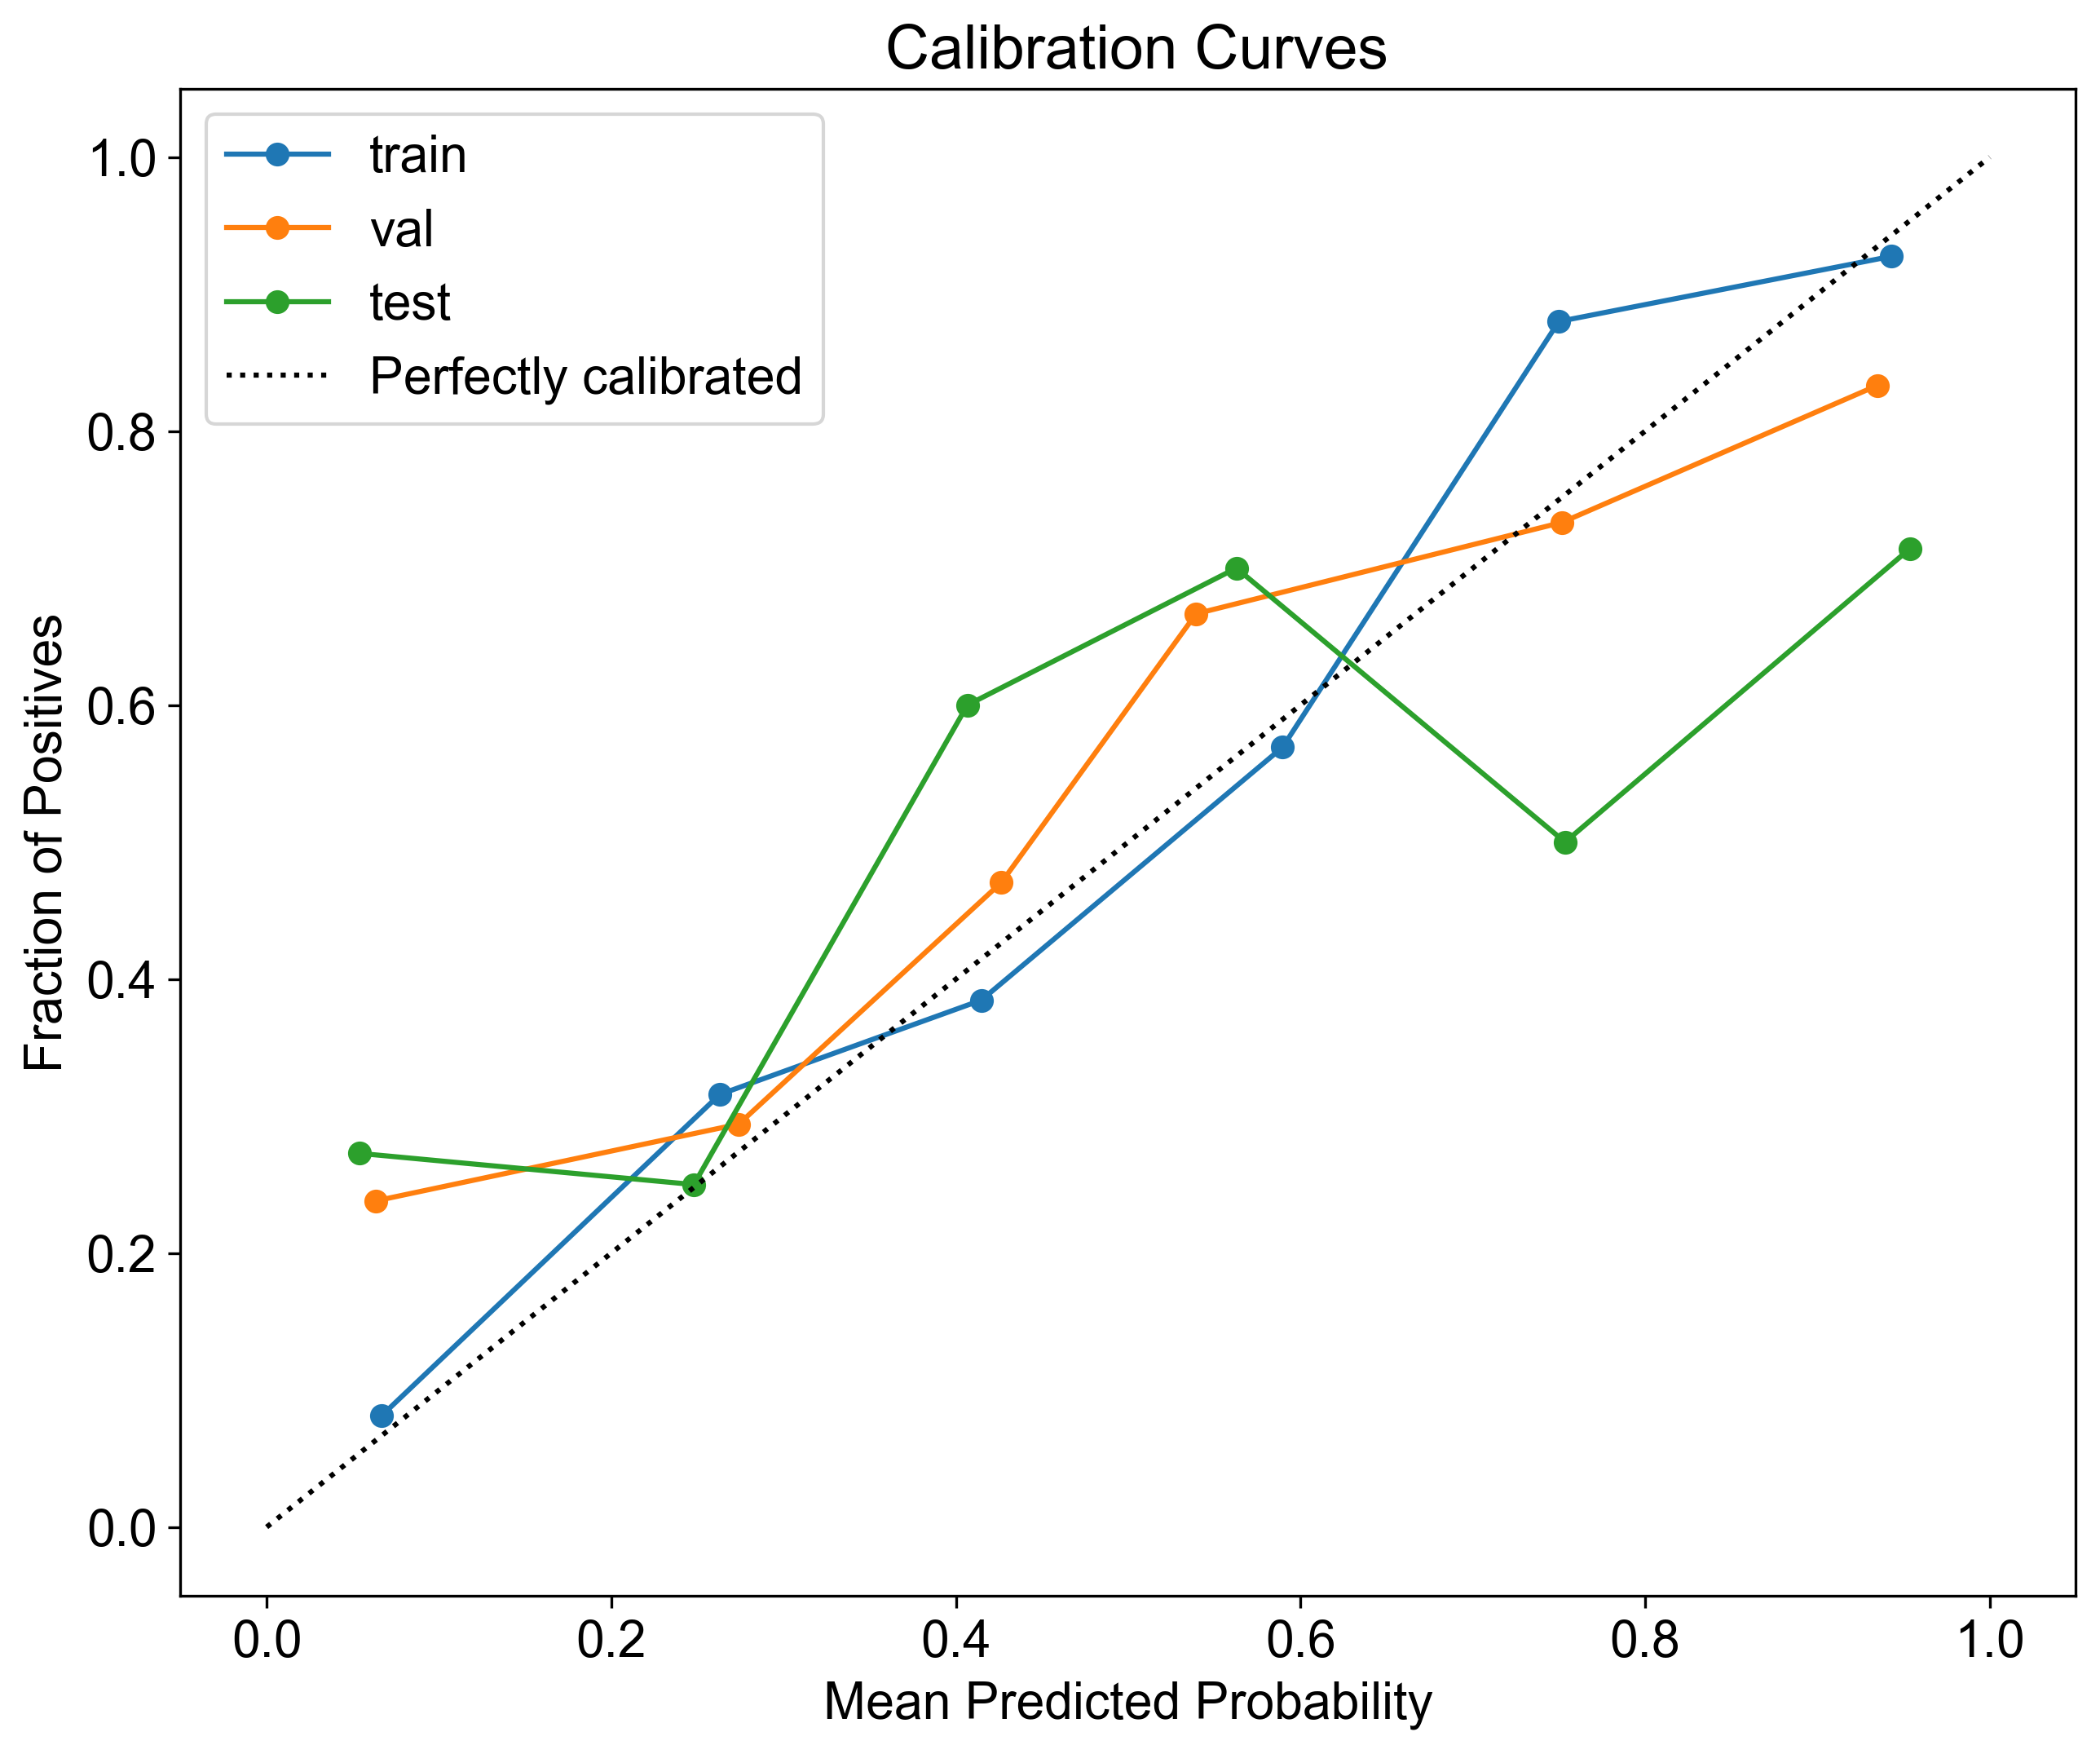

In [2]:
plot_calibration_curves(gt_list,prob_list,models=datasets,title='')

HosmerLemeshow 检验

In [3]:
for set ,gt, prob in zip(datasets,gt_list,prob_list):
    hl=HosmerLemeshow(gt,prob)
    print(set,hl)


train    df   Chi2  p - value
0   8  4.662      0.793
val    df    Chi2  p - value
0   8  32.475  8.000e-05
test    df    Chi2  p - value
0   8  45.543        0.0
